In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import rslaser
import scipy.optimize as opt

In [2]:
def super_gaussian(params, amplitude, xo, yo, sigma, exponent):
    exponent = 0.0001*exponent
    xo = float(xo)
    yo = float(yo)
    r = np.sqrt((params[0] - xo)**2 + (params[1] - yo)**2)
    g = amplitude * np.exp(-(r/abs(sigma))**exponent)
    return g.ravel()

In [3]:
image_file_name = 'basler_800nm_seed.bmp'
package_data_dir = rslaser.pkg_resources.resource_filename('rslaser','package_data')
path_to_file = os.path.join(package_data_dir, image_file_name)
image = Image.open(path_to_file)
img_orig = np.array(image)

In [4]:
print('np.shape(img_orig) = ', np.shape(img_orig))
print('min_orig = ', np.min(img_orig))
print('max_orig = ', np.max(img_orig))

x = np.linspace(0, img_orig.shape[1] - 1, img_orig.shape[1])
y = np.linspace(0, img_orig.shape[0] - 1, img_orig.shape[0])
x, y = np.meshgrid(x, y)

initial_guess = (3, 300, 300, 10, 2)
popt, pcov = opt.curve_fit(super_gaussian, (x, y), img_orig.flatten(), p0=initial_guess, maxfev=10000)
img_fit = super_gaussian((x, y), *popt).reshape(img_orig.shape)

np.shape(img_orig) =  (540, 720)
min_orig =  0
max_orig =  196


In [5]:
_max = popt[0]
_rx = popt[1]
_ry = popt[2]
_sig = popt[3]
_exp = popt[4] * 1.e-4
print('_max = ', _max)
print('_sig = ', _sig)
print('_exp = ', _exp)

_max =  139.54961378936636
_sig =  196.29392644550956
_exp =  2.1008993782355416


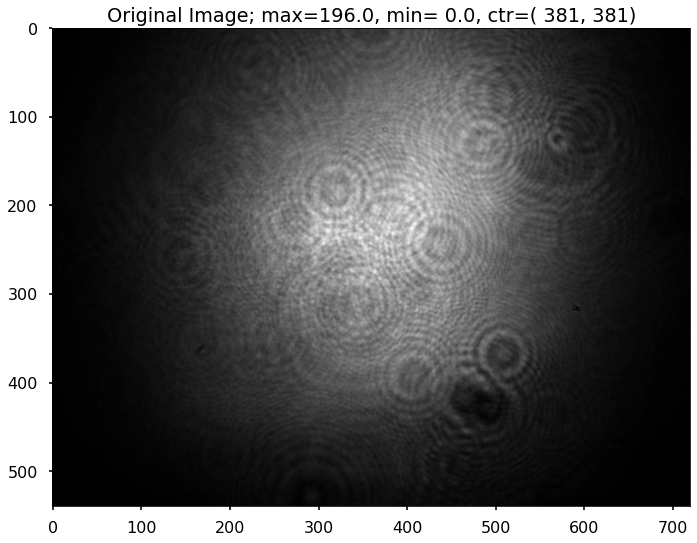

In [6]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
#    ax.imshow(img_orig, cmap='gray', vmin=0, vmax=255)
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Original Image; max={0:4.1f}'.format(np.max(img_orig))+', min={0:4.1f}'.format(np.min(img_orig))+', ctr=({0:4.0f},{0:4.0f})'.format(_rx,_ry))

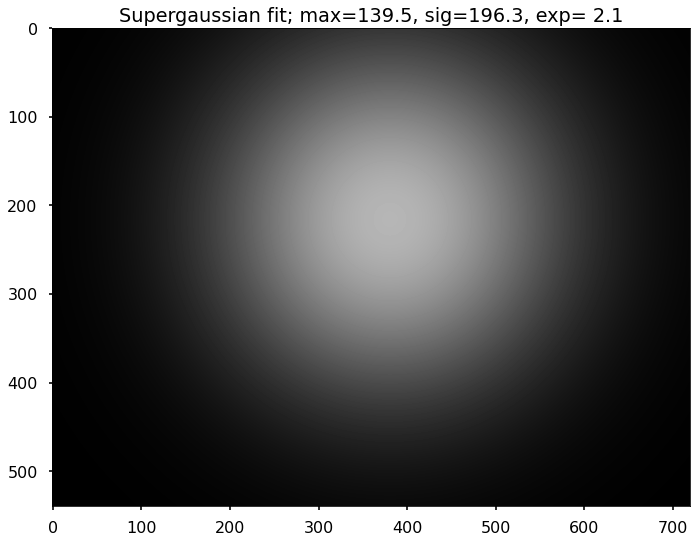

In [7]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_fit, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Supergaussian fit; max={0:4.1f}, '.format(_max)+'sig={0:4.1f}, '.format(_sig)+'exp={0:4.1f}'.format(_exp))

min_diff =  -45.30926976756926
max_diff =  65.99242439440665
relative deviation (above) =  33.66960428286054 %
relative deviation (below) =  23.116974371208805 %


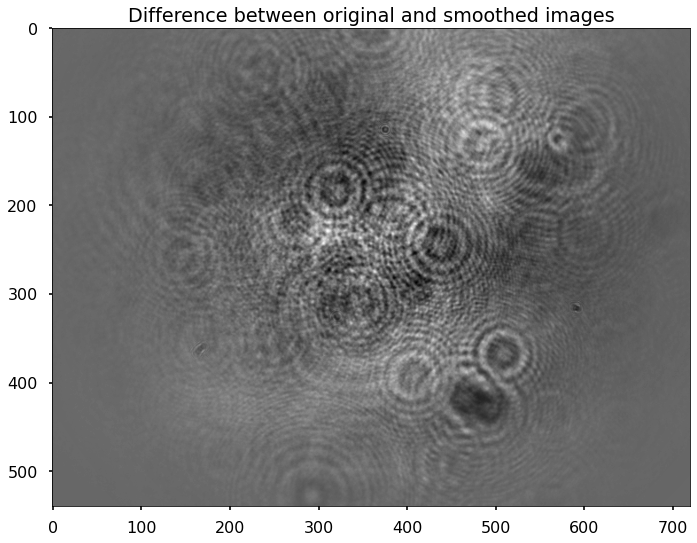

In [8]:
# img_diff = 128 + img_orig - img_fit
img_diff = img_orig - img_fit

print('min_diff = ', np.min(img_diff))
print('max_diff = ', np.max(img_diff))
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=np.min(img_diff), vmax=np.max(img_diff))
    ax.set_title("Difference between original and smoothed images")


print('relative deviation (above) = ', 100.*(np.max(img_diff)/np.max(img_orig)), '%')
print('relative deviation (below) = ', 100.*(abs(np.min(img_diff))/np.max(img_orig)), '%')

In [9]:
print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_fit = ')
print(img_fit)
min_fit = np.min(img_fit)
max_fit = np.max(img_fit)
print(' ')
print('min fitted = ', min_fit)
print('max fitted = ', max_fit)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 2 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
 
min original =  0
max original =  196
 
*************************
img_fit = 
[[0.63282325 0.64721251 0.66188686 ... 1.62368247 1.59197027 1.56077945]
 [0.64094233 0.65551452 0.67037538 ... 1.64432162 1.61221064 1.5806275 ]
 [0.64912626 0.66388283 0.67893166 ... 1.66512273 1.63260992 1.60063143]
 ...
 [0.11868836 0.12142283 0.12421243 ... 0.30861044 0.30249162 0.29647555]
 [0.11642558 0.11910828 0.12184506 ... 0.30276726 0.29676341 0.29086039]
 [0.11419882 0.11683055 0.11951535 ... 0.2970162  0.29112552 0.28533379]]
 
min fitted =  0.11419881692627694
max fitted =  139.5495242570888
 
*************************
img_diff = 
[[-0.63282325 -0.64721251 -0.66188686 ... -0.62368247 -0.59197027
  -0.56077945]
 [-0.64094233 -0.65551452 -0.67037538 ... -0.64432162 -0.61221064
  -0.5806275 ]
 [-0.64912626 -0.66388283 -0.67893166 ... -0.66